# **Environment Setup**

In [1]:
!pip install ultralytics --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.9 MB/s eta 0:00:00:00:0100:01


In [2]:
from ultralytics import YOLO
import torch
print('✅ CUDA Available:', torch.cuda.is_available())

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ CUDA Available: True


# **Dataset Download & Verification**

In [3]:
!pip install roboflow
from roboflow import Roboflow
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 33.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 78.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.8 MB/s eta 0:00:00:00:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigque

In [4]:
rf = Roboflow(api_key="j2GKG1mVqbH861sqwDmB")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(2)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-2 in yolov12:: 100%|██████████| 6472/6472 [00:00<00:00, 6840.96it/s]


In [5]:
dataset_dir = '/kaggle/working/PPE_Detection-2'
print(f'✅ Dataset located at: {dataset_dir}')

print('📂 Dataset Contents:', os.listdir(dataset_dir))

✅ Dataset located at: /kaggle/working/PPE_Detection-2
📂 Dataset Contents: ['README.roboflow.txt', 'train', 'valid', 'README.dataset.txt', 'data.yaml', 'test']


In [6]:
yaml_path = os.path.join(dataset_dir, 'data.yaml')
with open(yaml_path, 'r') as f:
    print(f.read())

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 7
names: ['Dust Mask', 'Eye Wear', 'Glove', 'Protective Boots', 'Protective Helmet', 'Safety Vest', 'Shield']

roboflow:
  workspace: project-uyrxf
  project: ppe_detection-v1x3l
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-uyrxf/ppe_detection-v1x3l/dataset/2


Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.


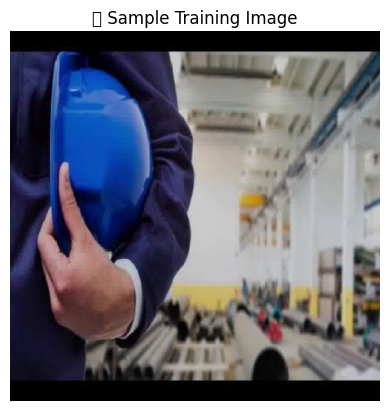

In [7]:
# Visual check
from PIL import Image
import matplotlib.pyplot as plt
sample_image = os.path.join(dataset_dir, 'train/images', os.listdir(os.path.join(dataset_dir, 'train/images'))[0])
img = Image.open(sample_image)
plt.imshow(img)
plt.axis('off')
plt.title('✅ Sample Training Image')
plt.show()

# **YOLOv12 Training**

In [8]:
model = YOLO(model='yolo12s.pt')

100%|██████████| 18.1M/18.1M [00:00<00:00, 131MB/s]


In [9]:
results = model.train(
    data=yaml_path,
    epochs=500,
    imgsz=640,
    batch=32,
    project='PPE_YOLOv12_Results',
    name='YOLOv12n_PPE',
    exist_ok=True
)

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/PPE_Detection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=500, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=YOLOv12n_PPE, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

100%|██████████| 755k/755k [00:00<00:00, 16.4MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    689408  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 72.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1265.1±461.0 MB/s, size: 66.1 KB)


train: Scanning /kaggle/working/PPE_Detection-2/train/labels... 2271 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2271/2271 [00:01<00:00, 1414.12it/s]


train: New cache created: /kaggle/working/PPE_Detection-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 440.1±269.5 MB/s, size: 95.2 KB)


val: Scanning /kaggle/working/PPE_Detection-2/valid/labels... 637 images, 0 backgrounds, 0 corrupt: 100%|██████████| 637/637 [00:00<00:00, 1204.00it/s]

val: New cache created: /kaggle/working/PPE_Detection-2/valid/labels.cache


Plotting labels to PPE_YOLOv12_Results/YOLOv12n_PPE/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to PPE_YOLOv12_Results/YOLOv12n_PPE
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      11.8G      1.482       2.81      1.528        227        640: 100%|██████████| 71/71 [00:58<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]

                   all        637       3064      0.644       0.59       0.64      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      11.9G      1.276      1.142      1.257        174        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]

                   all        637       3064      0.698      0.661      0.696      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      11.9G      1.337      1.132      1.283        228        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]

                   all        637       3064      0.634      0.544      0.578      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      11.9G      1.387      1.171      1.304        174        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]

                   all        637       3064      0.655      0.482      0.487      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      11.9G      1.375      1.129      1.309        260        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]

                   all        637       3064      0.729       0.59      0.615      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      11.8G      1.357      1.074      1.291        236        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]

                   all        637       3064      0.811      0.591      0.646      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      11.9G      1.327      1.052      1.278        220        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]

                   all        637       3064       0.69      0.607      0.647      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      11.9G      1.306      1.003      1.278        216        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]

                   all        637       3064      0.773      0.672      0.728      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      11.8G      1.291      0.973      1.254        240        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]

                   all        637       3064       0.75      0.667      0.717      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      11.8G      1.269     0.9589      1.245        166        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]

                   all        637       3064      0.741      0.717      0.737      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      11.8G      1.258     0.9437      1.253        255        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]

                   all        637       3064      0.776      0.693       0.74      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      11.8G      1.237     0.8998      1.233        239        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]

                   all        637       3064      0.858      0.727      0.799      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      11.8G      1.247     0.8955      1.234        170        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]

                   all        637       3064      0.747      0.739      0.771      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      11.8G      1.213      0.862      1.222        174        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]

                   all        637       3064      0.806      0.699      0.744       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      11.9G      1.208      0.864       1.22        221        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.79      0.693      0.764      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      11.9G      1.195     0.8398      1.212        241        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]

                   all        637       3064      0.725      0.753      0.778      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      11.9G      1.178     0.8259      1.205        224        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.877       0.73      0.801      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      11.8G      1.185       0.82      1.215        227        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]

                   all        637       3064      0.883      0.715      0.785      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      11.9G      1.162     0.7927      1.196        263        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.808      0.757      0.808      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      11.8G      1.158     0.7897      1.195        226        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.832      0.769      0.827      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      11.9G      1.154     0.7684      1.182        231        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.865      0.774      0.845      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      11.9G      1.138     0.7562      1.184        242        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.907       0.75      0.826      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      11.9G      1.134     0.7543      1.185        236        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.909      0.786       0.85      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      11.8G      1.134     0.7444      1.176        254        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.879      0.732      0.803      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      11.9G      1.137      0.743      1.177        188        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]

                   all        637       3064      0.883      0.763      0.851      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      11.9G      1.119     0.7174      1.167        221        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.925      0.777      0.847      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      11.9G      1.118     0.7216      1.165        236        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]

                   all        637       3064      0.875      0.763      0.819      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      11.9G      1.109     0.7256      1.171        240        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]

                   all        637       3064       0.86      0.768      0.828      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      11.9G      1.101     0.7058      1.159        179        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.871      0.782      0.826      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      11.8G      1.091     0.7011      1.161        235        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.852      0.782      0.837      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      11.8G       1.09     0.6901      1.156        203        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.889       0.76      0.848      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      11.8G      1.083     0.6822      1.151        208        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.877      0.778      0.845      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      11.8G      1.083     0.6772      1.146        224        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.85      0.816      0.856      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      11.9G      1.081     0.6742      1.138        171        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]

                   all        637       3064      0.859      0.777      0.833      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      11.8G      1.062     0.6593      1.143        220        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.889      0.784      0.846      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      11.8G      1.065     0.6641      1.139        203        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.887      0.771      0.844      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      11.8G      1.061     0.6535      1.139        230        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.857       0.81      0.863      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      11.9G      1.049     0.6519      1.134        234        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.908      0.799      0.877      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      11.8G      1.061     0.6497      1.134        216        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.852      0.843      0.874      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      11.9G      1.054     0.6509      1.131        220        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.913      0.811      0.879       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      11.9G      1.042     0.6369      1.126        161        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]

                   all        637       3064      0.896      0.804      0.862      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      11.8G      1.041     0.6279      1.131        141        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.884      0.797      0.868       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      11.9G      1.047     0.6305      1.128        207        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.893      0.805      0.874      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      11.8G      1.027     0.6222      1.122        235        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.878      0.818      0.864      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      11.9G       1.02     0.6188      1.114        263        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.871      0.813      0.864      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      11.9G      1.036     0.6184       1.12        165        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.898      0.803      0.863      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      11.9G      1.024     0.6118      1.111        214        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.895      0.806      0.874      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      11.8G      1.028     0.6111      1.121        190        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064        0.9      0.804      0.866      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      11.8G      1.013     0.5983      1.114        179        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.897      0.807       0.87      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      11.9G      1.007     0.6026      1.111        162        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.867      0.846      0.881        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      11.9G      1.015     0.6055      1.115        178        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.907      0.822       0.88      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      11.8G      1.006     0.5927      1.103        219        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.855      0.836      0.861       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      11.8G      1.007     0.5892        1.1        212        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.89      0.834      0.881      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      11.8G     0.9967     0.5857      1.104        179        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.888      0.834      0.879      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      11.9G      1.001     0.5893      1.104        211        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.871      0.847      0.888      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      11.8G     0.9984     0.5735      1.099        185        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.888      0.839       0.89       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      11.9G     0.9964     0.5812      1.101        217        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.874      0.852      0.898      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      11.8G     0.9779     0.5696      1.094        203        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.887      0.847      0.884      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      11.9G     0.9939     0.5781      1.102        286        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.873      0.864      0.901      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      11.8G     0.9834     0.5679      1.096        213        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.885      0.817      0.887      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      11.8G     0.9861       0.57      1.095        188        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.873      0.837      0.873        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500        12G     0.9747     0.5629      1.094        168        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.875      0.836       0.88      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      11.9G     0.9792     0.5652      1.091        252        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.866      0.843      0.882      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      11.8G     0.9731     0.5686      1.094        198        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.903      0.821      0.889      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      11.8G     0.9643     0.5614      1.086        166        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.91      0.827      0.896      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      11.9G      0.972     0.5548      1.085        153        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.883      0.836      0.889      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      11.9G     0.9557     0.5482      1.081        268        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.922      0.822      0.898      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      11.8G     0.9649     0.5458      1.081        193        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.913      0.836      0.896      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      11.9G     0.9648     0.5601       1.09        255        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.936      0.837      0.904      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      11.8G     0.9552     0.5481      1.082        242        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.892      0.844      0.892      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      11.9G     0.9644     0.5488      1.079        147        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.875      0.839      0.888       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      11.8G     0.9466      0.538      1.075        247        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.891      0.833      0.891       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      11.8G     0.9478     0.5436      1.075        224        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.871      0.865      0.888      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      11.8G     0.9445     0.5329      1.069        196        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.893      0.839      0.878       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      11.9G     0.9505     0.5376       1.08        189        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.898      0.835      0.892      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      11.8G     0.9361      0.529      1.071        243        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.912      0.831      0.898      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      11.8G     0.9531     0.5308      1.076        188        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931       0.84      0.898       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      11.9G     0.9331     0.5333      1.066        193        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.86      0.855      0.875      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      11.9G     0.9373     0.5244      1.066        217        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.932       0.83      0.897      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      11.8G     0.9255     0.5199      1.061        190        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.905      0.847      0.897      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      11.8G     0.9243     0.5195      1.059        255        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.916      0.868      0.914      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      11.9G     0.9416     0.5308      1.067        219        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.898      0.841      0.898      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      11.9G     0.9152     0.5102      1.058        184        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.87      0.888      0.912      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      11.8G     0.9309     0.5168      1.068        188        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.886      0.853      0.888      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      11.8G     0.9281     0.5199      1.062        208        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.91      0.838      0.903      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      11.8G     0.9155     0.5109      1.059        239        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064        0.9      0.863      0.906      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      11.9G     0.9187     0.5061      1.059        215        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.87      0.853      0.884      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      11.9G     0.9179     0.5122      1.052        151        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.92      0.855      0.907       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      11.9G     0.9167     0.5006      1.055        251        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.913      0.854      0.907      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      11.8G     0.9053     0.5098      1.051        174        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.908      0.854      0.902      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      11.8G     0.9035     0.5039      1.049        207        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.914      0.841       0.89      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      11.8G     0.9059     0.5017      1.052        230        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.937      0.832      0.902      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      11.8G     0.9003     0.5038      1.048        217        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.906      0.862      0.901      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      11.9G     0.9124     0.5045      1.054        197        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.941      0.855      0.906      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      11.9G     0.8978     0.4966      1.051        185        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.933      0.856      0.909       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      11.8G     0.8929     0.4919      1.052        237        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.885      0.876      0.907      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      11.8G     0.8873     0.4935      1.046        178        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.903      0.858      0.908      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      11.9G     0.8852     0.4892      1.045        232        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.934      0.863       0.91      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      11.8G      0.894     0.4887      1.043        149        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.905      0.883      0.913      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      11.8G     0.8885     0.4873      1.045        274        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.929      0.863      0.906      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      11.8G     0.8916     0.4926      1.048        235        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.915      0.862      0.915      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      11.9G     0.8918     0.4962      1.049        210        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.912      0.862      0.908      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      11.8G     0.8827     0.4857      1.043        187        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.905      0.879      0.907      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      11.9G      0.878     0.4828      1.045        196        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93      0.843      0.901      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      11.8G      0.871     0.4782      1.046        199        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.898      0.848      0.902      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      11.8G     0.8873     0.4849      1.052        247        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.92       0.87      0.921      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      11.8G     0.8684     0.4732       1.04        222        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.921      0.873      0.915      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      11.9G     0.8853     0.4861      1.042        184        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.901      0.863      0.907      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      11.9G     0.8764     0.4818      1.045        250        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.905      0.849      0.894      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      11.8G     0.8795      0.478      1.038        179        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.911      0.842      0.899      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      11.8G     0.8746     0.4797      1.034        199        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        637       3064      0.908      0.851      0.892      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      11.9G     0.8709     0.4674      1.034        258        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93      0.839      0.903      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      11.9G     0.8725     0.4712      1.037        180        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.902      0.868      0.915      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      11.8G     0.8657     0.4635      1.034        231        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        637       3064      0.916      0.859      0.907      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      11.8G     0.8612     0.4704      1.031        210        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.922      0.841      0.906      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      11.8G     0.8642     0.4735      1.031        181        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.913       0.87      0.914      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      11.9G     0.8525     0.4646      1.029        220        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.928      0.853      0.905      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      11.8G     0.8634     0.4724      1.038        256        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.919      0.855      0.901      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      11.8G     0.8591     0.4653      1.025        201        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.901      0.862      0.903      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      11.8G     0.8536      0.463      1.023        178        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.891      0.882      0.895      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      11.8G     0.8548     0.4658      1.027        193        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.912      0.857      0.907      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      11.8G     0.8513     0.4558      1.026        181        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.927      0.857      0.896      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      11.8G     0.8426      0.458      1.026        232        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        637       3064       0.92       0.84      0.904      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      11.9G     0.8553     0.4666      1.028        238        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.934       0.85      0.902      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      11.9G     0.8436     0.4502      1.021        220        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.914      0.839      0.897      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      11.8G     0.8516     0.4624      1.026        214        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.915      0.878      0.918      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      11.8G     0.8449     0.4619      1.027        204        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.898      0.877      0.915      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      11.8G     0.8491     0.4594      1.031        192        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.861      0.906      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      11.8G     0.8518     0.4564       1.02        174        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.899      0.888      0.921      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      11.9G     0.8325      0.447      1.017        188        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]

                   all        637       3064      0.885      0.857        0.9      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      11.8G     0.8419      0.452      1.021        231        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.924       0.86      0.906      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      11.8G     0.8326     0.4533      1.015        229        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.921      0.852      0.907      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      11.8G     0.8282     0.4504      1.017        228        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.903      0.872      0.912      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      11.8G     0.8291     0.4456      1.009        246        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.915      0.843      0.898      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      11.9G     0.8346     0.4523      1.015        192        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.911      0.865      0.908      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      11.8G     0.8304     0.4446      1.013        230        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.923      0.888      0.916      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      11.9G     0.8185      0.446      1.008        222        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.926       0.86      0.906      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      11.9G      0.829     0.4518      1.018        183        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.946      0.862       0.92      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      11.8G      0.831     0.4435      1.005        197        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.932      0.862      0.911      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      11.8G     0.8186     0.4472      1.006        209        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.883      0.885      0.911      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      11.9G      0.819     0.4436      1.006        178        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.922      0.866       0.91      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      11.8G     0.8275     0.4388      1.012        243        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.925      0.875      0.909      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      11.8G     0.8151     0.4355      1.008        207        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.893      0.878       0.91      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      11.9G     0.8156     0.4349      1.004        183        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.905      0.884      0.905      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      11.8G     0.8132     0.4389      1.008        252        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.905        0.9      0.917      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      11.8G     0.8161     0.4368      1.007        183        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.898      0.881      0.905       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      11.8G     0.8041     0.4286     0.9971        217        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.928      0.884      0.917      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      11.9G     0.8029     0.4318       1.01        232        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.909      0.875      0.909       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      11.9G     0.8055     0.4314      1.009        203        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.915      0.875      0.912      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      11.8G     0.8113     0.4415      1.008        247        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.92      0.873      0.914      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      11.8G     0.8016      0.433     0.9998        201        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.905      0.888      0.913      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      11.9G     0.7987     0.4325      1.002        205        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.937       0.87      0.911      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      11.8G     0.7986     0.4245     0.9932        230        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.901      0.881      0.909      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      11.8G     0.7928     0.4248     0.9929        234        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]

                   all        637       3064      0.922      0.885       0.92      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      11.8G     0.8002     0.4289     0.9948        203        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.905      0.895       0.92      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      11.9G     0.7905     0.4236     0.9943        192        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.92      0.887      0.918      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      11.8G     0.7916     0.4264     0.9963        229        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.876      0.915      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      11.8G     0.7941     0.4271     0.9973        235        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.92      0.878      0.911      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      11.8G     0.7964     0.4278      1.001        218        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.927      0.891      0.921      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      11.8G     0.7995     0.4291      1.003        178        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.861      0.912      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      11.8G     0.7912     0.4254      1.004        154        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.932      0.861       0.91      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      11.8G     0.7899      0.421      1.003        186        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.942      0.862      0.914      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      11.9G     0.7851     0.4179     0.9956        226        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.863      0.916      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      11.8G     0.7797     0.4172     0.9912        192        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.903      0.889      0.909      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      11.8G     0.7834     0.4179      0.994        226        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.897      0.886      0.911      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      11.8G     0.7879       0.42     0.9896        228        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.904      0.877      0.908      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      11.8G     0.7801     0.4136     0.9919        176        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.897      0.897      0.915      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      11.8G     0.7797     0.4191     0.9931        203        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.917      0.864      0.918      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      11.8G     0.7795     0.4187     0.9939        210        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.935      0.863      0.916      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      11.9G     0.7694     0.4091      0.985        215        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.925       0.87      0.914      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      11.8G     0.7643     0.4039     0.9816        192        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.916      0.883      0.912      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      11.9G     0.7761      0.413     0.9922        260        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        637       3064      0.919      0.871      0.908      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      11.9G     0.7729     0.4151       0.99        201        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.91      0.893      0.913      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      11.8G     0.7764      0.413     0.9931        196        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.919      0.877      0.916      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      11.8G     0.7624     0.4046     0.9832        225        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.915      0.882       0.92      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      11.8G     0.7661     0.4062     0.9884        265        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.929      0.865      0.918      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      11.8G      0.768     0.4086     0.9832        176        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.919      0.869      0.913      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      11.8G     0.7657     0.4073     0.9898        201        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.904      0.889       0.92      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      11.9G      0.768     0.4154     0.9836        221        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.934      0.866      0.918      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      11.8G     0.7767     0.4147     0.9926        199        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.937      0.859      0.911      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      11.9G     0.7628     0.4092     0.9825        198        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.927      0.864      0.917      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      11.8G     0.7688     0.4068     0.9832        183        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.923      0.882      0.919      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      11.8G       0.77     0.4079     0.9846        191        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.913      0.887      0.916      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      11.8G     0.7592     0.4039     0.9822        242        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.912      0.883      0.918      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      11.9G     0.7733     0.4116     0.9889        231        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.922      0.883      0.921      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      11.8G     0.7625     0.4014     0.9834        189        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.936       0.88      0.922      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      11.7G     0.7664     0.4061     0.9839        195        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        637       3064      0.936      0.881       0.92      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      11.8G     0.7512     0.3999     0.9851        177        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.922      0.889      0.919      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      11.9G     0.7512     0.3961     0.9769        167        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.909      0.894      0.916       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      11.8G     0.7526      0.398     0.9824        163        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.901      0.888      0.917      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      11.8G     0.7533     0.4002      0.981        194        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.92      0.883      0.913      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      11.8G     0.7577     0.3999     0.9749        170        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.909        0.9      0.921      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      11.9G     0.7573     0.3992     0.9792        183        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.881      0.912      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      11.9G     0.7515      0.393     0.9752        209        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.94      0.865      0.911      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      11.9G     0.7423     0.3905     0.9773        206        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.937      0.875      0.916      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      11.9G     0.7438     0.3928     0.9765        225        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931       0.88      0.919      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      11.8G     0.7434     0.3924     0.9735        220        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.917      0.894      0.918      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      11.8G     0.7444     0.3975     0.9748        194        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.912      0.883      0.914      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      11.8G     0.7452     0.3957     0.9816        210        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.916      0.875      0.917      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      11.8G     0.7411     0.3968     0.9711        218        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.882      0.901      0.917      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      11.8G     0.7475     0.3907     0.9773        172        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.921      0.869      0.913      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      11.9G     0.7403     0.3902     0.9784        164        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.919      0.874      0.919       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      11.9G     0.7391     0.3932     0.9755        192        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.913      0.891      0.917      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      11.9G     0.7325     0.3858     0.9704        199        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.918      0.875      0.915       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      11.9G     0.7425      0.388     0.9713        185        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.922      0.873      0.918      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      11.8G     0.7314     0.3897     0.9686        197        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.921      0.896      0.925      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      11.9G     0.7321     0.3891     0.9708        211        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.921      0.887      0.917      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      11.8G     0.7326     0.3835     0.9649        221        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.919       0.89      0.923      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      11.9G     0.7248     0.3859     0.9667        232        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.939      0.869      0.922      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      11.8G     0.7304     0.3843     0.9708        231        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.935       0.87      0.917      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      11.8G     0.7306     0.3847     0.9677        192        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]

                   all        637       3064      0.936      0.867      0.916      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      11.9G     0.7245     0.3811     0.9665        166        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]

                   all        637       3064      0.926      0.881      0.916       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      11.9G     0.7165     0.3759     0.9616        203        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.918      0.876      0.909      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      11.8G     0.7203     0.3777     0.9627        225        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.921      0.872      0.918      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      11.9G     0.7182     0.3792     0.9639        182        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.926      0.893      0.917      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      11.8G     0.7162     0.3776      0.961        269        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.923      0.892      0.913      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      11.8G      0.728     0.3765     0.9687        200        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.922      0.883      0.918      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500      11.8G      0.717     0.3777     0.9617        222        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.926      0.895      0.922      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      11.8G     0.7191     0.3775     0.9605        247        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.906      0.893       0.92      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      11.8G      0.714     0.3759     0.9638        211        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.922      0.886      0.921      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500      11.8G     0.7109     0.3784     0.9658        147        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.882      0.927      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      11.9G     0.7126     0.3769     0.9679        260        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.909       0.89       0.92      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      11.9G     0.7108     0.3733     0.9623        202        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.906       0.89      0.915      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      11.8G     0.7094     0.3744     0.9585        238        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.906      0.897      0.918       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500      11.9G     0.7008     0.3712     0.9575        183        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.941      0.872      0.913      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      11.8G     0.7021     0.3701     0.9578        143        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.938      0.875      0.915      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      11.8G     0.7022     0.3702     0.9544        188        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.94      0.866      0.914      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      11.8G     0.7143     0.3719     0.9554        194        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.933      0.875      0.919      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      11.9G     0.7047     0.3694     0.9584        210        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.932      0.872      0.919      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      11.8G     0.7024     0.3708     0.9546        250        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.926       0.88      0.915      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      11.8G        0.7       0.37     0.9586        138        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        637       3064      0.919      0.874      0.914      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      11.8G     0.7047     0.3721     0.9594        285        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.934      0.879      0.919      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      11.8G     0.7002      0.365     0.9552        205        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.918      0.873      0.912      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      11.8G     0.7038      0.373     0.9513        288        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        637       3064      0.904      0.893      0.915      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      11.8G     0.7001     0.3625     0.9495        184        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.901      0.891      0.908      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      11.8G     0.7016     0.3692     0.9576        181        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        637       3064      0.913      0.879      0.909      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      11.8G     0.6919      0.371      0.955        204        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.855      0.913      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      11.9G     0.7024      0.366     0.9562        191        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.919       0.86      0.905      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      11.8G     0.6937     0.3694     0.9574        236        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.919      0.872      0.907      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      11.8G     0.6958     0.3672     0.9527        241        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.921      0.884      0.913      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      11.9G     0.6961     0.3645     0.9534        232        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.937      0.858      0.906      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      11.9G     0.6919      0.365     0.9509        167        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.935      0.864      0.908      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      11.8G     0.6865     0.3628     0.9464        157        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.918      0.874      0.908      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      11.8G     0.6927     0.3656     0.9463        232        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.918      0.879      0.905      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      11.9G     0.6863     0.3657      0.948        262        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.906      0.888      0.903       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      11.8G     0.6904     0.3584     0.9505        209        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.926      0.878      0.907      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      11.8G     0.6772     0.3608     0.9458        200        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.928      0.861      0.909      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      11.9G     0.6794     0.3542     0.9518        270        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.942      0.858      0.907      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      11.9G     0.6812     0.3585     0.9518        188        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.921       0.88      0.912      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      11.8G     0.6824     0.3558     0.9498        210        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.913      0.881      0.915      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      11.9G     0.6843     0.3645     0.9533        176        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.928      0.866      0.911      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      11.8G     0.6869     0.3603     0.9522        212        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.909       0.88      0.908      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      11.9G     0.6757     0.3587      0.952        221        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.932       0.88      0.916      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      11.8G     0.6797     0.3614     0.9436        230        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.946      0.877      0.916      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      11.8G     0.6657      0.351     0.9427        223        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.927      0.896      0.917       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      11.8G     0.6798     0.3564     0.9498        238        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.928      0.893      0.915      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      11.8G     0.6695     0.3548     0.9467        220        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.927       0.89      0.914      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      11.9G     0.6763     0.3538     0.9516        196        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.926      0.893      0.916      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      11.9G     0.6728      0.355     0.9426        215        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.926       0.89      0.915      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      11.9G     0.6757     0.3535     0.9403        188        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.91      0.889      0.914      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      11.9G     0.6796      0.355     0.9444        200        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.943      0.866      0.913      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      11.8G     0.6762     0.3542     0.9423        180        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.937      0.867      0.914      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      11.8G     0.6664     0.3506     0.9397        184        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.941      0.866      0.917      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      11.8G     0.6588     0.3491     0.9368        246        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.942      0.864      0.917      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      11.8G      0.662     0.3481     0.9384        186        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.937      0.869      0.914      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      11.8G     0.6708     0.3577     0.9417        235        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.938      0.868      0.911      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      11.9G     0.6591     0.3486     0.9429        198        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.927      0.869      0.913      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      11.8G     0.6643     0.3518     0.9414        264        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.864      0.911      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      11.9G     0.6515     0.3442     0.9404        173        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.932      0.862       0.91      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      11.9G     0.6585     0.3446      0.936        191        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.92      0.861      0.911      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      11.8G     0.6562     0.3468     0.9339        224        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.923       0.86      0.912      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      11.8G     0.6524      0.347      0.934        196        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.929      0.855      0.915      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      11.9G     0.6631     0.3516     0.9427        290        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.922      0.861      0.913      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      11.8G     0.6565     0.3407     0.9365        244        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.942      0.856      0.914      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      11.9G     0.6473     0.3415     0.9369        183        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93       0.86      0.915      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      11.8G     0.6532     0.3441     0.9389        227        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.869      0.918      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      11.8G     0.6595     0.3473     0.9353        210        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.935      0.867       0.92      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      11.8G     0.6497     0.3459     0.9349        170        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.92      0.873       0.92      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      11.8G     0.6492     0.3456     0.9324        214        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.921       0.88      0.923      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      11.8G     0.6531     0.3435      0.937        200        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.925      0.878      0.919      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      11.9G     0.6515     0.3419     0.9363        237        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.905      0.893      0.916       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      11.8G     0.6439     0.3369     0.9295        242        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.907      0.889      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      11.8G     0.6426      0.337     0.9289        208        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.898      0.888      0.911      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      11.8G     0.6397     0.3355     0.9296        210        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.916      0.877      0.912      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      11.9G     0.6576     0.3455     0.9398        216        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.935      0.868      0.921      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      11.8G     0.6439     0.3393     0.9355        190        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.927      0.872       0.92      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      11.9G      0.647     0.3416     0.9295        280        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.927      0.872      0.916      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500      11.8G     0.6477     0.3412     0.9299        179        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.935      0.866      0.917      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      11.8G     0.6357     0.3364       0.93        202        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.938      0.866      0.915      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      11.8G     0.6391     0.3366     0.9317        174        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.941      0.865      0.912      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      11.8G     0.6368     0.3325     0.9307        141        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.937      0.866      0.913      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      11.8G     0.6385     0.3351     0.9271        231        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.937      0.867      0.912      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500      11.8G     0.6361     0.3327     0.9316        193        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.939      0.868      0.913      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      11.9G     0.6367     0.3362     0.9312        191        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.936      0.874      0.909      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      11.8G     0.6387     0.3358     0.9293        219        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.943      0.871      0.911      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      11.8G      0.627     0.3311     0.9247        209        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.937      0.873      0.909      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      11.8G     0.6298     0.3284     0.9237        226        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.936      0.872       0.91      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      11.8G     0.6306     0.3301     0.9264        255        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.937      0.871      0.912      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      11.8G      0.635     0.3329     0.9258        225        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.936      0.875      0.914      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      11.8G     0.6296      0.329     0.9256        206        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.943      0.872      0.911      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      11.8G     0.6248     0.3279     0.9228        179        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.945      0.873      0.912      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      11.8G     0.6349      0.335     0.9275        198        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.943      0.874      0.912      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      11.8G     0.6259     0.3302     0.9218        176        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.941      0.876       0.91      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      11.8G     0.6265     0.3271     0.9248        206        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.938      0.877      0.909      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      11.8G     0.6198     0.3274     0.9235        218        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        637       3064       0.94      0.876      0.912      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500      11.8G     0.6146     0.3247     0.9226        204        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.938      0.876      0.913      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      11.8G     0.6149     0.3265     0.9239        201        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.94      0.879      0.912      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      11.9G     0.6299     0.3289     0.9262        198        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.939      0.872      0.912      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      11.8G     0.6285     0.3319     0.9249        218        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.94      0.867      0.911      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      11.8G     0.6194     0.3261     0.9204        202        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.934      0.874      0.913       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      11.8G     0.6145     0.3254      0.924        246        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.938      0.871      0.914       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      11.8G     0.6261     0.3322     0.9258        192        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.938      0.873      0.914      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500      11.8G     0.6119     0.3208     0.9185        137        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.944      0.867      0.914      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      11.9G     0.6075     0.3204     0.9181        229        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.944      0.867      0.913       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      11.9G     0.6098     0.3228     0.9196        227        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.943      0.865      0.914      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      11.9G     0.6169     0.3246     0.9225        202        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.934      0.871      0.915      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      11.8G     0.6123     0.3261     0.9211        215        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.922      0.874      0.915      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      11.9G     0.6127     0.3232     0.9185        184        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        637       3064      0.934      0.871      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      11.8G     0.6089     0.3224     0.9155        212        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.937      0.871      0.916      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      11.8G     0.6044     0.3205     0.9198        217        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.937       0.87      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      11.8G     0.6134     0.3281     0.9196        205        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.938      0.868      0.918      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      11.8G     0.6048     0.3203     0.9178        209        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        637       3064      0.944      0.868      0.918      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      11.8G     0.6077     0.3226     0.9174        185        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.946       0.87      0.919      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      11.8G     0.6003     0.3173     0.9127        239        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.942      0.871      0.919      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      11.9G     0.6069     0.3207     0.9143        194        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.941      0.872      0.918      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      11.9G      0.598     0.3197     0.9163        224        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.941      0.874      0.918      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      11.8G     0.6085     0.3226     0.9177        170        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.939      0.874      0.917      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500      11.8G     0.6018     0.3171     0.9137        202        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.937      0.871      0.916      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      11.8G      0.597     0.3152     0.9107        204        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.941      0.863      0.915      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500      11.8G     0.6054      0.315     0.9116        195        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.94      0.864      0.913      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      11.8G     0.5946     0.3122     0.9112        207        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.941      0.864      0.914      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      11.8G     0.5929      0.313     0.9106        212        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.935      0.873      0.916      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      11.9G      0.591     0.3116     0.9131        183        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.942      0.866      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      11.8G     0.5883     0.3116     0.9161        219        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        637       3064      0.944      0.866      0.915      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      11.9G     0.5954     0.3134     0.9139        190        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.944      0.866      0.915      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      11.9G     0.5912     0.3131      0.912        198        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]

                   all        637       3064      0.942      0.868      0.916      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500      11.9G     0.5975     0.3172     0.9104        189        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.941      0.867      0.915       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500      11.9G     0.5881     0.3063      0.912        175        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.941      0.867      0.915       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      11.9G     0.5853      0.307     0.9134        144        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.94      0.866      0.916       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      11.8G     0.5898     0.3127     0.9144        204        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.926      0.881      0.917       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500      11.8G     0.5878     0.3087     0.9115        219        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        637       3064      0.926      0.883      0.916      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      11.8G     0.5836     0.3094     0.9085        140        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.925      0.884      0.916      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      11.8G      0.585     0.3097     0.9057        204        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.943      0.866      0.915      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      11.8G     0.5872     0.3091     0.9142        237        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.943      0.866      0.916      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      11.8G     0.5821     0.3051     0.9069        177        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.944      0.868      0.915      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500      11.8G      0.587     0.3092     0.9122        223        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.943      0.868      0.915      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      11.8G     0.5838     0.3091     0.9078        157        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.941       0.87      0.915      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500      11.8G     0.5788     0.3055     0.9074        215        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.936      0.881      0.916      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500      11.9G     0.5781     0.3048     0.9094        243        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.936       0.88      0.915      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500      11.8G     0.5838     0.3064     0.9097        178        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.94       0.87      0.914      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      11.8G     0.5738     0.3039     0.9058        193        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.941      0.869      0.915      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500      11.8G     0.5805     0.3054     0.9024        196        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.942      0.868      0.914      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500      11.8G     0.5721     0.3029     0.9014        226        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.944      0.866      0.913      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500      11.8G     0.5776      0.303     0.9054        228        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.943      0.866      0.913       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500      11.9G     0.5774     0.3024     0.9052        219        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.94      0.868      0.911      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      11.9G      0.571     0.3011     0.9042        160        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.942      0.868      0.912      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500      11.8G     0.5793     0.3041     0.9051        178        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.939       0.87      0.912      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500      11.8G      0.576     0.3035     0.9049        282        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.941      0.869      0.912       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500      11.8G     0.5693     0.2991     0.9038        221        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.94      0.876      0.915      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500      11.8G     0.5669     0.2994     0.8991        207        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.936      0.877      0.915       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500      11.8G     0.5678     0.2994     0.8986        186        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.937      0.877      0.915       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500      11.8G     0.5701     0.2998     0.9056        224        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.929      0.872      0.913      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/500      11.8G     0.5677        0.3     0.8976        216        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.937      0.877      0.917      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/500      11.8G      0.563     0.2984     0.8997        230        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.932      0.881      0.918      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/500      11.8G     0.5671     0.2976     0.9038        207        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.929      0.873      0.916      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/500      11.8G     0.5593     0.2987     0.8983        226        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.927      0.875      0.916      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/500      11.8G     0.5651     0.3003     0.8994        236        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.926      0.875      0.916      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/500      11.8G     0.5665     0.3017     0.9031        227        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.925      0.876      0.915      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/500      11.9G     0.5518     0.2948     0.8986        231        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.925      0.876      0.916      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/500      11.9G     0.5546     0.2923     0.8974        217        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.926      0.876      0.915      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/500      11.8G     0.5599     0.2961     0.9015        217        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.926      0.876      0.914      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/500      11.8G     0.5535     0.2929     0.8967        206        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.927      0.876      0.914      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/500      11.8G     0.5589      0.294     0.9003        203        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.927      0.876      0.914      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/500      11.9G     0.5532     0.2915     0.8957        240        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.928      0.875      0.914      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/500      11.9G     0.5586     0.2943     0.9002        170        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.928      0.874      0.914       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/500      11.8G     0.5584     0.2956     0.8983        212        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.926      0.875      0.914       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/500      11.8G     0.5435     0.2881     0.8971        183        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.865      0.913      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/500      11.8G     0.5529     0.2899     0.8973        177        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.929      0.866      0.913       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/500      11.9G     0.5496     0.2926     0.8919        245        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.867      0.913       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/500      11.9G     0.5451     0.2905      0.893        252        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.867      0.914       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/500      11.8G     0.5484     0.2882     0.8919        225        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.868      0.913      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/500      11.8G     0.5498     0.2912     0.8961        194        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93      0.869      0.913      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/500      11.8G     0.5468     0.2887     0.8941        210        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.929      0.869      0.913       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/500      11.9G     0.5523     0.2911     0.8958        229        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.929      0.869      0.913       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/500      11.8G      0.552     0.2913     0.8945        183        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.929      0.869      0.913       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/500      11.8G      0.541     0.2869     0.8937        198        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.929      0.869      0.913      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/500      11.7G     0.5516     0.2885     0.8988        219        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.929       0.87      0.914      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/500      11.8G     0.5464     0.2905     0.8937        197        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931       0.87      0.914      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/500      11.9G     0.5486     0.2882     0.8952        201        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.869      0.914      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/500      11.9G      0.547     0.2852     0.8951        189        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.867      0.913      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/500      11.9G     0.5393     0.2887     0.8961        207        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.868      0.914      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/500      11.8G      0.538     0.2855     0.8911        232        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.868      0.914      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/500      11.8G     0.5427     0.2864     0.8959        213        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.932      0.866      0.914      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/500      11.9G     0.5411     0.2876     0.8963        219        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.865      0.914      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/500      11.8G     0.5392     0.2846     0.8929        266        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.865      0.914      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/500      11.8G     0.5321     0.2804     0.8903        218        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.865      0.915      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/500      11.9G     0.5308     0.2823     0.8898        182        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.866      0.915      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/500      11.8G     0.5425     0.2858     0.8907        258        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.867      0.915      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/500      11.9G     0.5274     0.2817     0.8901        204        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.866      0.916      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/500      11.8G     0.5307     0.2832     0.8944        221        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.929      0.867      0.916      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/500      11.8G     0.5235     0.2803     0.8896        186        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.928      0.867      0.917      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/500      11.9G     0.5335     0.2885     0.8915        179        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        637       3064      0.928      0.867      0.917      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/500      11.9G     0.5284     0.2819     0.8902        184        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.938      0.871       0.92      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/500      11.8G     0.5267      0.281     0.8887        153        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.938      0.872      0.921      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/500      11.8G     0.5391     0.2848     0.8972        155        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.938      0.872       0.92      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/500      11.8G     0.5188     0.2786     0.8863        223        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.938      0.872       0.92      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/500      11.9G     0.5226     0.2782     0.8871        187        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.938      0.872       0.92      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    408/500      11.8G     0.5188     0.2746      0.885        203        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.94      0.873       0.92      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    409/500      11.9G     0.5167     0.2767     0.8856        242        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.94      0.872       0.92      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    410/500      11.8G     0.5134     0.2753     0.8827        204        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.94      0.873       0.92      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    411/500      11.9G     0.5204      0.277     0.8822        164        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.94      0.873       0.92      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    412/500      11.8G     0.5209     0.2773     0.8843        187        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.941      0.872      0.919      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    413/500      11.9G     0.5149     0.2768      0.883        227        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.941      0.873      0.918      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    414/500      11.8G     0.5154     0.2769     0.8855        173        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.94      0.873      0.917      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    415/500        12G     0.5242     0.2785     0.8851        193        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.938      0.872      0.917      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    416/500      11.8G      0.511     0.2733     0.8826        245        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.936      0.873      0.917      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    417/500      11.8G     0.5136     0.2735     0.8832        215        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.938      0.873      0.916      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    418/500      11.8G     0.5146     0.2725     0.8849        207        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.939      0.873      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    419/500      11.9G     0.5128     0.2722     0.8847        204        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.938      0.873      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    420/500      11.8G     0.5149     0.2739     0.8835        176        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.937      0.874      0.916       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    421/500      11.8G     0.5076     0.2691      0.882        196        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.937      0.874      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    422/500      11.8G     0.5133     0.2718     0.8864        236        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.938      0.874      0.915      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    423/500      11.9G     0.5148     0.2724     0.8833        185        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.937      0.874      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    424/500      11.9G     0.5067     0.2703     0.8838        224        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.937      0.874      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    425/500      11.8G     0.5123     0.2731     0.8818        135        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.937      0.874      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    426/500      11.8G     0.5073     0.2719      0.882        226        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.937      0.874      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    427/500      11.9G     0.5037     0.2689     0.8783        217        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.936      0.874      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    428/500      11.9G     0.5083     0.2743     0.8843        201        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.937      0.874      0.916      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    429/500      11.8G     0.5029     0.2705     0.8837        194        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.937      0.873      0.917      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    430/500      11.8G     0.5017     0.2681     0.8872        224        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.866      0.913      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    431/500      11.8G     0.4963     0.2661      0.881        186        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.866      0.912      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    432/500      11.9G     0.4964      0.266     0.8812        201        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.939      0.871      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    433/500      11.8G     0.4942     0.2641      0.879        252        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.939      0.871      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    434/500      11.8G     0.5014     0.2686     0.8832        215        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        637       3064       0.94      0.871      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    435/500      11.8G     0.5017     0.2718     0.8784        153        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.941      0.871      0.916      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    436/500      11.9G     0.4999     0.2686     0.8846        228        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.94      0.871      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    437/500      11.8G     0.4933     0.2646      0.881        235        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.94      0.871      0.916      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    438/500      11.8G     0.4956      0.265     0.8803        217        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.94      0.871      0.916       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    439/500      11.9G     0.4886     0.2614     0.8785        215        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.932      0.865      0.912       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    440/500      11.9G     0.4917     0.2623     0.8786        209        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.865      0.912       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    441/500      11.8G     0.4927     0.2631     0.8809        212        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.865      0.912      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    442/500      11.9G      0.491     0.2663      0.879        183        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.932      0.864      0.912      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    443/500      11.8G     0.4951     0.2667     0.8794        164        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.911      0.879      0.912      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    444/500      11.8G     0.4927     0.2639     0.8814        209        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.911       0.88      0.912      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    445/500      11.8G     0.4949      0.267     0.8781        230        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.911       0.88      0.912      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    446/500      11.8G     0.4957     0.2663     0.8774        276        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.909      0.881      0.912      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    447/500      11.8G     0.4912     0.2627      0.879        198        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.907      0.881      0.912      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    448/500      11.8G     0.4819      0.259     0.8749        172        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.905       0.88      0.912      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    449/500      11.9G     0.4903     0.2634     0.8765        183        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.929      0.859      0.912      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    450/500      11.8G     0.4914     0.2603     0.8806        141        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.929      0.859      0.912      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    451/500      11.8G     0.4829      0.258     0.8777        216        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.929      0.859      0.912      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    452/500      11.8G     0.4788     0.2571     0.8742        253        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.858      0.912      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    453/500      11.8G      0.473     0.2567      0.874        160        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.929       0.86      0.912      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    454/500      11.8G      0.482     0.2575     0.8726        231        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93       0.86      0.911      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    455/500      11.9G     0.4805     0.2605     0.8739        180        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93       0.86      0.911      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    456/500      11.8G     0.4857     0.2627     0.8762        170        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93       0.86      0.911      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    457/500      11.8G      0.486     0.2585      0.874        203        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93       0.86       0.91      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    458/500      11.9G     0.4828     0.2594     0.8764        217        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]

                   all        637       3064       0.93       0.86      0.911      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    459/500      11.8G     0.4767     0.2543     0.8734        197        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93      0.859      0.911      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    460/500      11.9G     0.4732     0.2552      0.877        222        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.859       0.91      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    461/500      11.8G      0.476     0.2567     0.8731        190        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.859       0.91      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    462/500      11.8G     0.4684     0.2536       0.87        212        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93       0.86       0.91      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    463/500      11.8G     0.4701      0.253     0.8724        203        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93       0.86      0.909      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    464/500      11.8G     0.4675     0.2513     0.8711        255        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93       0.86       0.91      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    465/500      11.8G     0.4707     0.2542     0.8747        201        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.858       0.91      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    466/500      11.8G     0.4678     0.2531     0.8715        228        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.858      0.909      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    467/500      11.8G     0.4675      0.252     0.8673        243        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.859      0.909      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    468/500      11.8G     0.4669     0.2525     0.8718        187        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.858      0.909      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    469/500      11.9G     0.4734      0.255     0.8747        207        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.858      0.909      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    470/500      11.9G     0.4658     0.2512     0.8708        203        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.858      0.909      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    471/500      11.8G     0.4694     0.2513     0.8696        207        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.858       0.91      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    472/500      11.9G     0.4693     0.2511     0.8692        180        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.858       0.91       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    473/500      11.9G     0.4669      0.251     0.8692        266        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93      0.863       0.91       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    474/500      11.8G     0.4654     0.2512     0.8704        277        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93      0.863       0.91      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    475/500      11.8G     0.4698     0.2555     0.8691        223        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.863       0.91      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    476/500      11.8G     0.4698     0.2508     0.8711        224        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.863       0.91      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    477/500      11.9G     0.4606     0.2509     0.8678        275        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.863       0.91      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    478/500      11.8G     0.4592     0.2471     0.8678        210        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.863      0.909       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    479/500      11.9G     0.4654     0.2496     0.8677        221        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93      0.863       0.91       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    480/500      11.9G     0.4576     0.2479     0.8682        185        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.863       0.91       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    481/500      11.9G     0.4507     0.2438     0.8659        194        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.862      0.909       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    482/500      11.8G     0.4556     0.2463     0.8671        239        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.862      0.909       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    483/500      11.9G     0.4553     0.2465     0.8667        243        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93      0.862      0.909      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    484/500      11.9G     0.4539     0.2472     0.8678        232        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93      0.862      0.909       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    485/500      11.8G     0.4633     0.2502      0.869        252        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.862       0.91       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    486/500      11.8G     0.4523     0.2471     0.8668        253        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]

                   all        637       3064      0.931      0.862      0.909       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    487/500      11.9G     0.4562     0.2425     0.8658        223        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.862      0.909      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    488/500      11.8G     0.4563     0.2485     0.8657        199        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.862      0.909       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    489/500      11.8G     0.4496     0.2461     0.8665        152        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.862      0.908      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    490/500      11.8G      0.452     0.2451      0.868        167        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.862      0.909      0.679


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    491/500      11.9G     0.4301     0.2218     0.8412        123        640: 100%|██████████| 71/71 [01:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93      0.862      0.908      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    492/500      11.9G     0.4178     0.2164       0.84        135        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.862      0.908      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    493/500      11.8G     0.4017     0.2091     0.8354        171        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.862      0.908      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    494/500      11.9G     0.4131     0.2145     0.8404        129        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93      0.862      0.908      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    495/500      11.9G     0.4004     0.2105     0.8324        135        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.862      0.907      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    496/500      11.9G     0.4095     0.2142      0.842        133        640: 100%|██████████| 71/71 [01:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064       0.93      0.862      0.907      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    497/500      11.9G     0.4045     0.2148      0.838        170        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        637       3064      0.931      0.862      0.907      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    498/500      11.8G     0.3979     0.2099     0.8351        148        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064       0.93      0.862      0.907      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    499/500      11.8G     0.3997     0.2109     0.8356        129        640: 100%|██████████| 71/71 [01:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]

                   all        637       3064      0.931      0.861      0.907      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    500/500      11.8G     0.3975     0.2111     0.8334        129        640: 100%|██████████| 71/71 [01:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        637       3064      0.931      0.861      0.907      0.678



500 epochs completed in 10.257 hours.
Optimizer stripped from PPE_YOLOv12_Results/YOLOv12n_PPE/weights/last.pt, 19.0MB
Optimizer stripped from PPE_YOLOv12_Results/YOLOv12n_PPE/weights/best.pt, 19.0MB

Validating PPE_YOLOv12_Results/YOLOv12n_PPE/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,233,589 parameters, 0 gradients, 21.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.06it/s]
invalid value encountered in less
invalid value encountered in less


                   all        637       3064      0.938      0.872      0.921      0.684
             Dust Mask        299        308      0.963      0.945      0.971      0.748
              Eye Wear        146        147      0.906       0.85      0.901      0.565
                 Glove        346        631      0.976      0.892      0.947      0.741
      Protective Boots        298        608      0.962       0.97      0.985      0.752
     Protective Helmet        403        753      0.971       0.96      0.981      0.785
           Safety Vest        359        592      0.911      0.899      0.924      0.744
                Shield         25         25       0.88      0.589      0.738      0.454
Speed: 0.2ms preprocess, 9.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to PPE_YOLOv12_Results/YOLOv12n_PPE


✅ Training complete. Results stored at: /kaggle/working/PPE_YOLOv12_Results/YOLOv12n_PPE


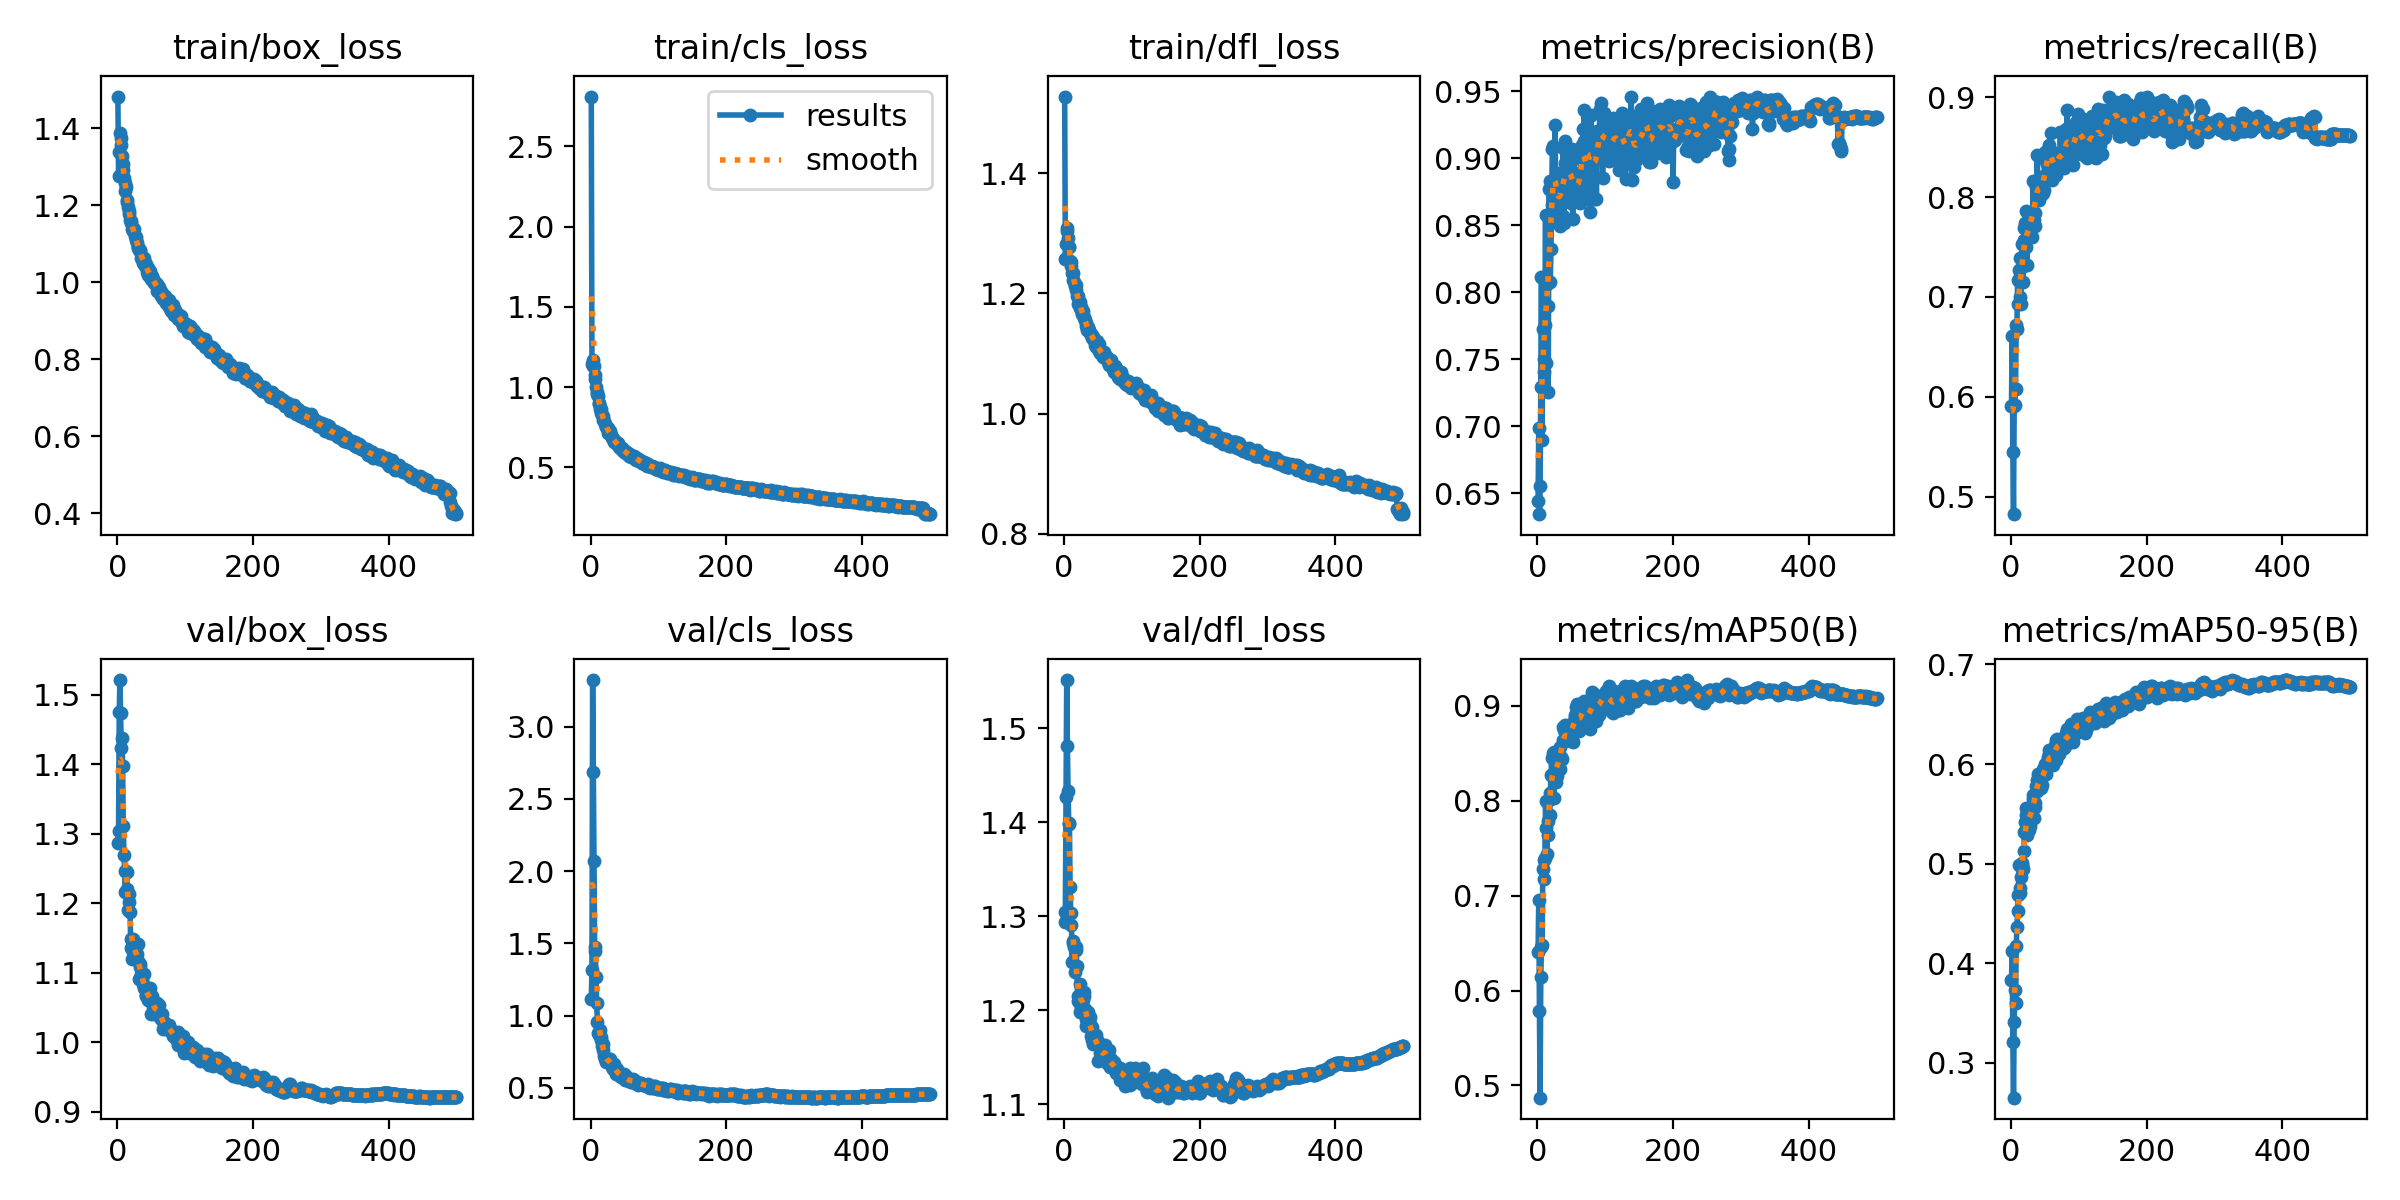

In [10]:
results_dir = '/kaggle/working/PPE_YOLOv12_Results/YOLOv12n_PPE'
print('✅ Training complete. Results stored at:', results_dir)

from IPython.display import Image as IPyImage
if os.path.exists(results_dir):
    display(IPyImage(filename=os.path.join(results_dir, 'results.png')))
else:
    print('❌ Results image not found.')

# **Validation and Metrics**

In [11]:
metrics = model.val(data=yaml_path, imgsz=640, batch=32)
print('✅ Validation complete.')
print(metrics)

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,233,589 parameters, 0 gradients, 21.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1829.9±584.4 MB/s, size: 67.6 KB)


val: Scanning /kaggle/working/PPE_Detection-2/valid/labels.cache... 637 images, 0 backgrounds, 0 corrupt: 100%|██████████| 637/637 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:14<00:00,  1.38it/s]
invalid value encountered in less
invalid value encountered in less


                   all        637       3064      0.938      0.872      0.921      0.684
             Dust Mask        299        308      0.963      0.945      0.971      0.748
              Eye Wear        146        147      0.906       0.85      0.901      0.567
                 Glove        346        631      0.975      0.891      0.945      0.742
      Protective Boots        298        608      0.964      0.972      0.986      0.751
     Protective Helmet        403        753      0.971       0.96      0.981      0.785
           Safety Vest        359        592      0.909      0.897      0.923      0.743
                Shield         25         25       0.88      0.589      0.737      0.454
Speed: 1.0ms preprocess, 17.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to PPE_YOLOv12_Results/YOLOv12n_PPE
✅ Validation complete.
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.me

# **Inference on Single Image**

In [13]:
test_image_path = '/kaggle/working/PPE_Detection-2/test/images/20220721_162435_jpg.rf.d478427044384d4e32ba0c25b15b720d.jpg' 

predict_results = model.predict(
    source=test_image_path,
    save=True,
    project='PPE_YOLOv12_Inference',
    name='Single_Inference',
    conf=0.25
)


image 1/1 /kaggle/working/PPE_Detection-2/test/images/20220721_162435_jpg.rf.d478427044384d4e32ba0c25b15b720d.jpg: 640x640 1 Eye Wear, 20.9ms
Speed: 2.2ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to PPE_YOLOv12_Inference/Single_Inference


Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.


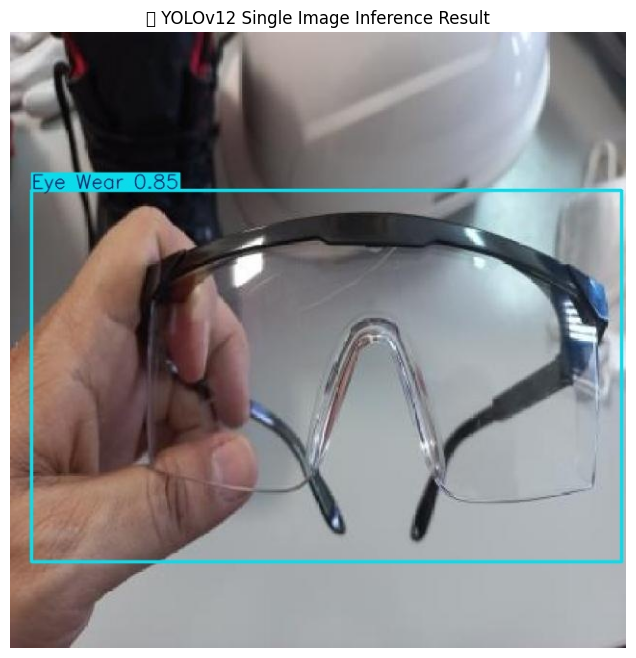

In [14]:
inference_image_path = '/kaggle/working/PPE_YOLOv12_Inference/Single_Inference/20220721_162435_jpg.rf.d478427044384d4e32ba0c25b15b720d.jpg'
img = Image.open(inference_image_path)
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')
plt.title('✅ YOLOv12 Single Image Inference Result')
plt.show()

# **Zip results**

In [15]:
!zip -r yolo_v12.zip /kaggle/working/PPE_YOLOv12_Results

  adding: kaggle/working/PPE_YOLOv12_Results/ (stored 0%)
  adding: kaggle/working/PPE_YOLOv12_Results/YOLOv12n_PPE/ (stored 0%)
  adding: kaggle/working/PPE_YOLOv12_Results/YOLOv12n_PPE/BoxP_curve.png (deflated 11%)
  adding: kaggle/working/PPE_YOLOv12_Results/YOLOv12n_PPE/train_batch1.jpg (deflated 2%)
  adding: kaggle/working/PPE_YOLOv12_Results/YOLOv12n_PPE/val_batch0_pred.jpg (deflated 10%)
  adding: kaggle/working/PPE_YOLOv12_Results/YOLOv12n_PPE/train_batch2.jpg (deflated 2%)
  adding: kaggle/working/PPE_YOLOv12_Results/YOLOv12n_PPE/train_batch0.jpg (deflated 1%)
  adding: kaggle/working/PPE_YOLOv12_Results/YOLOv12n_PPE/val_batch1_labels.jpg (deflated 8%)
  adding: kaggle/working/PPE_YOLOv12_Results/YOLOv12n_PPE/confusion_matrix_normalized.png (deflated 18%)
  adding: kaggle/working/PPE_YOLOv12_Results/YOLOv12n_PPE/confusion_matrix.png (deflated 20%)
  adding: kaggle/working/PPE_YOLOv12_Results/YOLOv12n_PPE/results.csv (deflated 64%)
  adding: kaggle/working/PPE_YOLOv12_Results/